## **Section 1: Import libraries**

In [ ]:
!pip install tensorflow

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import r2_score

## **Section 2: Load data**

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

Data.Precipitation   Date.Full  Date.Month  Date.Week of  Date.Year  \
0                0.00  2016-01-03           1             3       2016   
1                0.00  2016-01-03           1             3       2016   
2                0.16  2016-01-03           1             3       2016   
3                0.00  2016-01-03           1             3       2016   
4                0.01  2016-01-03           1             3       2016   

  Station.City Station.Code Station.Location Station.State  \
0   Birmingham          BHM   Birmingham, AL       Alabama   
1   Huntsville          HSV   Huntsville, AL       Alabama   
2       Mobile          MOB       Mobile, AL       Alabama   
3   Montgomery          MGM   Montgomery, AL       Alabama   
4    Anchorage          ANC    Anchorage, AK        Alaska   

   Data.Temperature.Avg Temp  Data.Temperature.Max Temp  \
0                         39                         46   
1                         39                         47   
2                         46                         51   
3                         45                         52   
4                         34                         38   

   Data.Temperature.Min Temp  Data.Wind.Direction  Data.Wind.Speed  
0                         32                   33             4.33  
1                         31                   32             3.86  
2                         41                   35             9.73  
3                         38                   32             6.86  
4                         29                   19             7.80

## **Section 3: Preprocessing**

In [ ]:
train_data = data[(data['Date.Year'] >= 2016) & (data['Date.Year'] <= 2017)][['Date.Month', 'Data.Temperature.Max Temp', 'Data.Wind.Speed', 'Data.Precipitation']]
test_data = data[(data['Date.Year'] == 2017)][['Date.Month', 'Data.Temperature.Max Temp', 'Data.Wind.Speed', 'Data.Precipitation']]
mean = train_data.mean()
std = train_data.std()
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std
n_steps = 7
batch_size = 64
train_samples = len(train_data) - n_steps
test_samples = len(test_data) - n_steps

## **Section 4: Create data generator**

In [ ]:
train_data_gen = keras.preprocessing.timeseries_dataset_from_array(
    train_data[['Date.Month', 'Data.Temperature.Max Temp', 'Data.Wind.Speed']].values,
    train_data['Data.Precipitation'].values,
    sequence_length=n_steps,
    batch_size=batch_size
)
test_data_gen = keras.preprocessing.timeseries_dataset_from_array(
    test_data[['Date.Month', 'Data.Temperature.Max Temp', 'Data.Wind.Speed']].values,
    test_data['Data.Precipitation'].values,
    sequence_length=n_steps,
    batch_size=batch_size
)

## **Section 5: Define model**

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(n_steps, len(train_data.columns) - 1)),
    keras.layers.LSTM(64),
    keras.layers.Dense(1)
])

In [ ]:
model

<Sequential name=sequential_1, built=True>

## **Section 6: Compile model**

In [ ]:
model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

## **Section 7: Train model**

In [ ]:
model.fit(train_data_gen, epochs=100, batch_size=batch_size)

Epoch 1/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9218 - mae: 0.6141
Epoch 2/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9119 - mae: 0.6059
Epoch 3/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9137 - mae: 0.6089
Epoch 4/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9102 - mae: 0.6128
Epoch 5/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9009 - mae: 0.6049
Epoch 6/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9107 - mae: 0.6078
Epoch 7/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8897 - mae: 0.6005
Epoch 8/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8855 - mae: 0.5972
Epoch 9/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8767 - mae: 0.5983
Epoch 10/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8712 - mae: 0.5936
Epoch 11/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8767 - mae: 0.5920
Epoch 12/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8519 - mae: 0.5833
Epoch 13/100


## **Section 8: Test model and print results**

In [ ]:
X_test = np.array([test_data.values[i:i+n_steps,:-1] for i in range(test_samples)])
y_true = test_data[n_steps:]['Data.Precipitation'].values.reshape(-1, 1)
y_pred = model.predict(X_test)

mse = tf.keras.losses.MeanSquaredError()(y_true, y_pred).numpy()
mae = tf.keras.losses.MeanAbsoluteError()(y_true, y_pred).numpy()
r2 = r2_score(y_true, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('R-squared: ', r2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE:  0.5740909
MAE:  0.5678903
R-squared:  -0.3580242023473994


## **Section 9: Plot true vs predicted precipitation values**

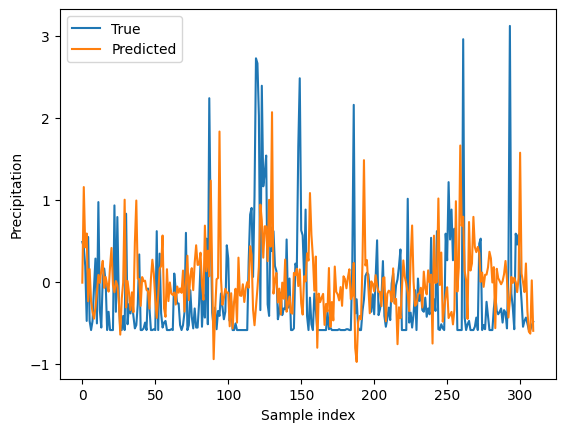

In [ ]:
plt.plot(y_true, label='True')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample index')
plt.ylabel('Precipitation')
plt.legend()
plt.show()